# News Classifier
Detect if news is fake or not?  By Basmala Ahmed.

### Importing used Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### Loading Datasets and EDA

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0


In [ ]:
df_test.head()

,ID,title,text,subject,date
0,1,U.S. judge presses Trump administration on Dre...,NEW YORK (Reuters) - A U.S. judge on Thursday ...,politicsNews,21-Sep-17
1,2,U.S. judge questions government on Trump's lat...,"GREENBELT, Md. (Reuters) - A U.S. judge on Mon...",politicsNews,16-Oct-17
2,3,U.S. judge questions states seeking to restore...,SAN FRANCISCO (Reuters) - A U.S. judge on Mond...,politicsNews,23-Oct-17
3,4,U.S. judge refuses to halt New York nuclear po...,NEW YORK (Reuters) - A federal judge on Tuesda...,politicsNews,25-Jul-17
4,5,U.S. judge rejects bid to dismiss Indonesian i...,BOSTON (Reuters) - A federal judge on Wednesda...,worldnews,25-Oct-17


In [ ]:
df_train.shape, df_test.shape

((44919, 6), (4496, 5))

#### Cleaning Data

In [ ]:
df_train.isnull().sum()

,0
ID,4513
title,4492
text,4492
subject,4505
date,4505
class,4505


In [ ]:
df_train.dropna(subset=['class'],inplace=True)

In [ ]:
df_test.isnull().sum()

,0
ID,0
title,0
text,0
subject,0
date,0


### Dropping unneeded columns for DATA

In [ ]:
del df_train['ID']
del df_train['subject']
del df_train['date']
del df_train['title']
df_train.head()

,text,class
0,What will the world be like post-Donald Trump?...,0.0
1,The police shooting of black teen Michael Brow...,0.0
2,The six months since President Donald Trump wa...,0.0
3,"Last Friday, New Jersey Governor Chris Christi...",0.0
4,"The incredibly talented voice actor, Billy Wes...",0.0


### Visualiztion for read the count of fake or real news

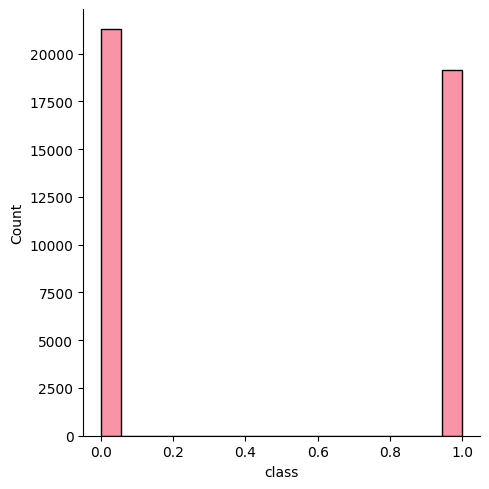

In [ ]:
sns.set_palette('husl')
sns.displot(data=df_train, x='class')

### Splitting the training dataset (df_train) into two sets: X_train, y_train, X_val, and y_val.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train['text'], df_train['class'], test_size=0.2, random_state=42)

### Tokenization and Data NLP

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to X_train and X_test
X_train = [preprocess_text(text) for text in X_train]
X_test = [preprocess_text(text) for text in X_val]


# Additional preprocessing steps
# 1. Handling numerical values (replace with a placeholder token)
X_train = [re.sub(r'\d+(?:\.\d+)?', 'NUM_TOKEN', text) for text in X_train]
X_test = [re.sub(r'\d+(?:\.\d+)?', 'NUM_TOKEN', text) for text in X_test]

# 2. Customizing stopwords list
custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'nor'}  # Exclude negation words
X_train = [preprocess_text(text) for text in X_train]
X_test = [preprocess_text(text) for text in X_test]

# 3. Handling special characters or symbols (example: removing '@' mentions or '#' symbols)
X_train = [re.sub(r'@[A-Za-z0-9]+', '', text) for text in X_train]
X_test = [re.sub(r'@[A-Za-z0-9]+', '', text) for text in X_test]
X_train = [re.sub(r'#', '', text) for text in X_train]
X_test = [re.sub(r'#', '', text) for text in X_test]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


1- creates an instance of the TfidfVectorizer class.

2- Fits the vectorizer on the training text data (X_train) and transforms it into a TF-IDF matrix representation.

3- transforms the test text data (X_test) into a TF-IDF matrix representation using the vocabulary learned from the training data.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

### DecisionTreeClassifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

DTC = DecisionTreeClassifier()
DTC.fit(X_train_transformed, y_train)
predictions = DTC.predict(X_test_transformed)

accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy of DTC:", accuracy)

Validation Accuracy of DTC: 0.9969070889521218


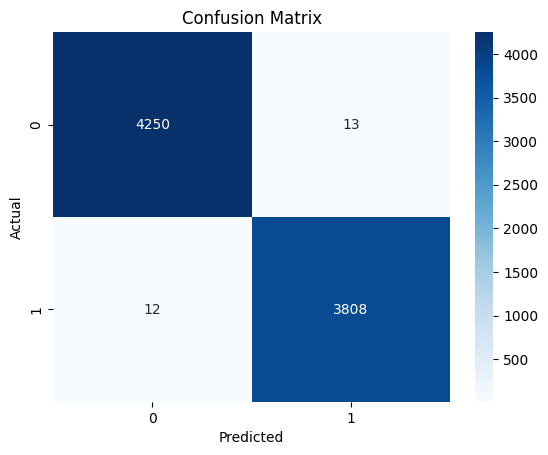

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4263
         1.0       1.00      1.00      1.00      3820

    accuracy                           1.00      8083
   macro avg       1.00      1.00      1.00      8083
weighted avg       1.00      1.00      1.00      8083



In [ ]:
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report = classification_report(y_val, predictions)
print(report)

### Gradient Boosting Classifier Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train_transformed, y_train)

predictions = GBC.predict(X_test_transformed)

accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy of GBC:", accuracy)
report = classification_report(y_val, predictions)
print(report)

Validation Accuracy of GBC: 0.9955462080910553
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4263
         1.0       0.99      1.00      1.00      3820

    accuracy                           1.00      8083
   macro avg       1.00      1.00      1.00      8083
weighted avg       1.00      1.00      1.00      8083



# Creating The Submission File

### Predicting the test cases using best Model
### Based on Tests, GradientBoostingClassifier was better

In [ ]:
df_test['text'] = [preprocess_text(text) for text in df_test['text']]
test_text = vectorizer.transform(df_test['text'])
test_labels = DTC.predict(test_text)

In [ ]:
df_test['TARGET'] = test_labels

In [ ]:
df_test[['ID','TARGET']]

,ID,TARGET
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
4491,4492,1.0
4492,4493,1.0
4493,4494,1.0
4494,4495,1.0


In [ ]:
df_test[['ID','TARGET']].to_csv('submissionDTc2.csv',index=False)